In [ ]:
import onnxruntime as ort
import numpy as np
import inference_utils as utils

# Load the ONNX model

model_path = "models/trafficcamnet_pruned_onnx_v1.0.4/resnet18_trafficcamnet_pruned.onnx"
session = ort.InferenceSession(model_path)
# Get model input and output names
input_name = session.get_inputs()[0].name
output_names = [output.name for output in session.get_outputs()]
#output_name = session.get_outputs()[0].name

# Prepare input data
# This depends on your model's expected input shape and type
image_path = "images/image2.png"
input_image = utils.image_to_tensor(image_path)
# Run inference
results = session.run([output_name], {input_name: input_image})

# Process the output
print(results[0].shape)
print(results[1].shape)
predictions = results[0][0]

(1, 4, 34, 60)


IndexError: list index out of range

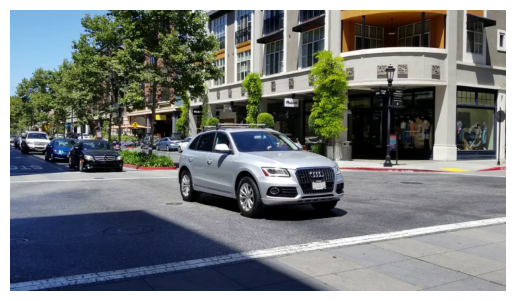

In [7]:
import importlib

importlib.reload(utils)

utils.show_image_from_tensor(input_image)

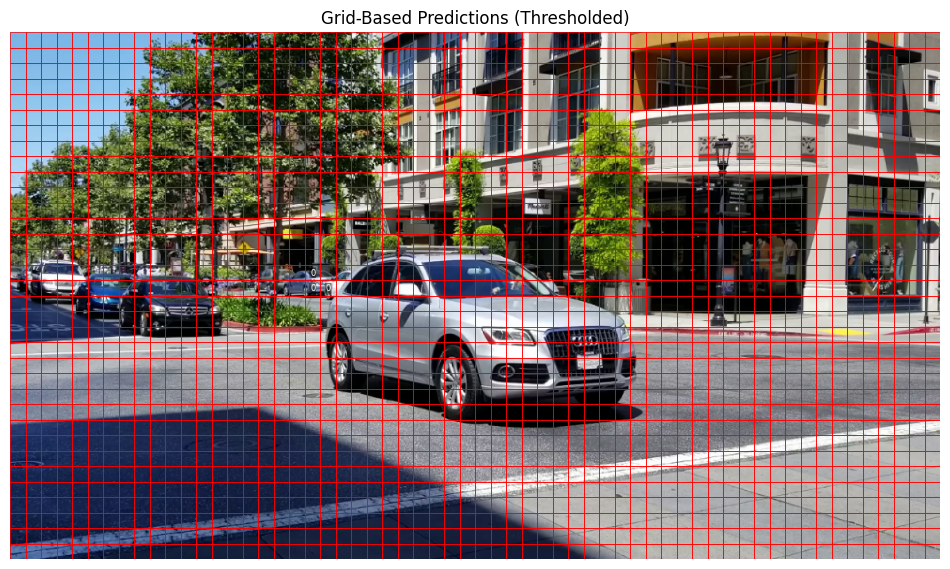

In [8]:

importlib.reload(utils)
utils.visualize_predictions(image_path,predictions,confidence_threshold=0.5)

[1 2 0]


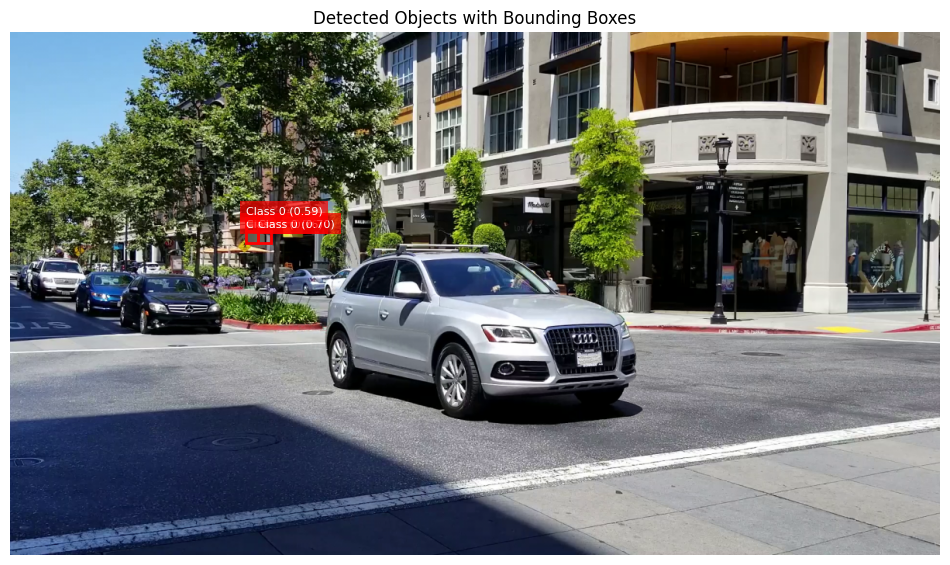

In [13]:


importlib.reload(utils)


bounding_boxes = utils.extract_bounding_boxes(predictions, confidence_threshold=0.5)
#for box in bounding_boxes:
    #print(f"Class {box[4]} at [{box[0]}, {box[1]}, {box[2]}, {box[3]}] with confidence {box[5]:.2f}")
utils.draw_bounding_boxes(image_path,bounding_boxes)